<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project_including_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [93]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [94]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [95]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [96]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [97]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [98]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [99]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 itens and each item itself list of 10 values 
    and S_actual, I_actual, R_actual are list of S, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """

S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [100]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]  

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]


In [101]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [102]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6], axis=1)
data.columns = range(data.shape[1])
data.head()

,0,1,2,3,4,5
0,202.876808,0.045273,797.077918,202.872644,0.039175,797.088181
1,992.440494,4.265644,3.293862,990.114016,5.418647,4.467337
2,990.114016,5.418647,4.467337,987.168436,6.874514,5.957050
3,870.428846,60.686774,68.884380,842.753385,72.206413,85.040203
4,346.840045,124.214419,528.945536,327.232637,114.725648,558.041716


In [103]:
X = data[[0,1,2]]
y = data[[3,4,5]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)




Epoch 00001: val_accuracy improved from -inf to 0.98687, saving model to weights-improvement-01-0.99.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy improved from 0.98687 to 0.99125, saving model to weights-improvement-02-0.99.hdf5

Epoch 00003: val_accuracy did not improve from 0.99125

Epoch 00004: val_accuracy did not improve from 0.99125

Epoch 00005: val_accuracy improved from 0.99125 to 0.99187, saving model to weights-improvement-05-0.99.hdf5

Epoch 00006: val_accuracy improved from 0.99187 to 0.99250, saving model to weights-improvement-06-0.99.hdf5

Epoch 00007: val_accuracy did not improve from 0.99250

Epoch 00008: val_accuracy did not improve from 0.99250

Epoch 00009: val_accuracy did not improve from 0.99250

Epoch 00010: val_accuracy did not improve from 0.99250

Epoch 00011: val_accuracy did not improve from 0.99250

Epoch 00012: val_accuracy did not improve from 0.99250

Epoch 00013: val_accuracy did not improve from 0.99250

Epoch 00014: val_accuracy did not improve from 0.99250

Epoch 00015: val_accuracy did not improve from 0.99250

Epoch 00016: val_accuracy did not improve from 0.9925

In [110]:
predicted_y = model.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_y)

1030.6762162531106

In [112]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 22us/step
Accuracy: 99.35


In [113]:
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)
df_7 = pd.DataFrame(y_pred1)
df_8 = pd.DataFrame(y_pred2)

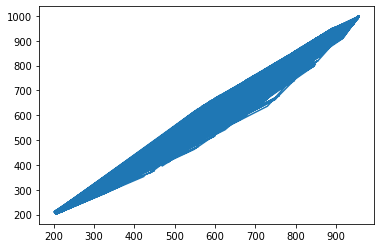

In [119]:
#plot of S_pred1 vs s_actual1                
#pred1 corresponds to prediction on training sets , where as actual1 corresponds actual value(y_train)
plt.figure(figsize=(6,4))
plt.plot(df_7[0],y_train[3])                                   

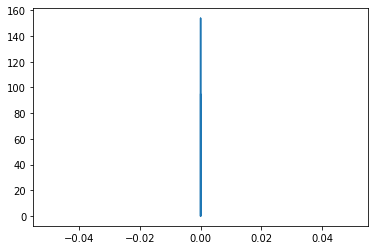

In [120]:
plt.figure(figsize=(6,4))
plt.plot(df_7[1],y_train[4])    #plot of I_pred1 vs I_actual1

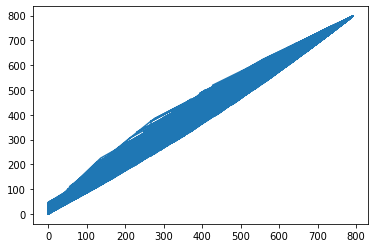

In [123]:
plt.figure(figsize=(6,4))
plt.plot(df_7[2],y_train[5])    #plot of R_pred1 vs R_actual1

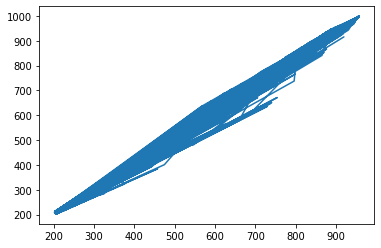

In [122]:
#plot of S_pred2 vs S_actual2
#pred2 corresponds to prediction on test sets , where as actual2 corresponds actual value(y_test)
plt.figure(figsize=(6,4))
plt.plot(df_8[0],y_test[3])    

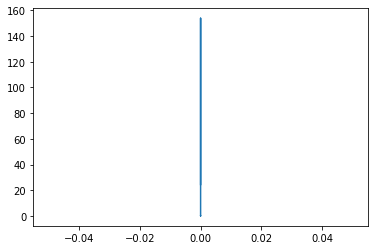

In [125]:
plt.figure(figsize=(6,4))
plt.plot(df_8[1],y_test[4])    #plot of I_pred2 vs I_actual2

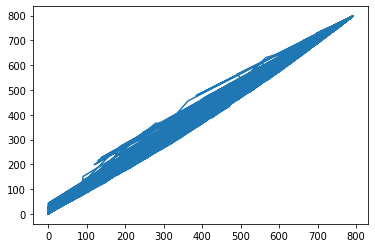

In [126]:
plt.figure(figsize=(6,4))
plt.plot(df_8[2],y_test[5])    #plot of R_pred2 vs R_actual2